In [49]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px


In [50]:
# Import data
file_path = Path("../Training_Data/2016_10_day.csv")
df= pd.read_csv(file_path)
df.head()


,Date,home,visitor,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,Home_PitchingK%,...,Visitor_PitchingOBP_allowed,Visitor_PitchingSLG%_allowed,Home_HittingK%,Home_HittingBB%,Home_HittingOBP,Home_HittingSLG%,Visitor_HittingK%,Visitor_HittingBB%,Visitor_HittingOBP,Visitor_HittingSLG%
0,2016-04-13,NYM,MIA,-130,115,-115,105,1,0,0.262745,...,0.350000,0.414286,0.247059,0.109804,0.279528,0.248889,0.218623,0.089069,0.355102,0.442396
1,2016-04-13,WAS,ATL,-240,210,-141,126,1,0,0.221719,...,0.370242,0.445344,0.217391,0.117391,0.346491,0.383838,0.241509,0.120755,0.301527,0.290749
2,2016-04-13,PHI,SDG,-120,110,-115,105,1,0,0.246429,...,0.334426,0.476015,0.251799,0.061151,0.275362,0.366142,0.227425,0.070234,0.298658,0.364964
3,2016-04-13,CUB,CIN,-215,190,-200,175,1,0,0.239316,...,0.328244,0.371681,0.200692,0.131488,0.371528,0.440329,0.190283,0.089069,0.331967,0.422018
4,2016-04-13,STL,MIL,-170,150,-145,130,0,1,0.221818,...,0.349624,0.540426,0.239203,0.106312,0.369128,0.470588,0.273092,0.116466,0.322581,0.396313


2. Standardize the data of all the DataFrame features.

In [51]:
# selectn standardized data
df_scaled = StandardScaler().fit_transform( df.iloc[:,9:])
print(df_scaled)

[[ 1.54720677 -1.04725076 -0.5138743  ...  0.41918839  1.09977417
   0.43096829]
 [ 0.30760192  0.76422225 -0.369167   ...  2.10044483 -0.59343849
  -2.11008445]
 [ 1.05419691  0.24182149 -1.23914591 ... -0.58018326 -0.68411132
  -0.86652071]
 ...
 [ 0.54593451 -0.3298119  -0.73897455 ...  0.64935075 -1.32949731
  -0.98658542]
 [-0.26808516  2.16599763  1.73367969 ...  1.71534608  0.44440399
  -0.607279  ]
 [-0.38867983  0.63472721  0.02918275 ...  1.37819823  2.16309463
   2.1311205 ]]


3. Apply PCA to reduce dimensions from 4 to 2 and create a DataFrame with the principal components data.

In [52]:
# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data.
df_pca = pca.fit_transform(df_scaled)



In [53]:
# Transform PCA data to a DataFrame
pca_df_result = pd.DataFrame(
    data=df_pca, columns=["principal component 1", "principal component 2"]
)
pca_df_result.head()


,principal component 1,principal component 2
0,0.602605,1.178000
1,2.287261,-0.370454
2,1.309994,1.534366
3,3.590013,0.598958
4,1.325239,-2.328230


4. Fetch the explained variance, analyze its value and answer the following question, are two principal components the best number of new dimensions?

In [56]:
# Fetch the explained variance
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.17838127 0.15710528]
0.3354865538664671


**Sample Answer**

According to the explained variance, the first principal component contains `17.8%` of the variance and the second principal component contains `15.7%` of the variance. We have `33.5%` of the information in the original dataset, so we can explore increasing the number of principal components up to three to verify if this ratio increases.

5. If you conclude that two principal components is the appropriate number of new dimensions, proceed to step 6, on the contrary, explore what happens if you modify the number of principal components. Once you finish, write your conclusions.

In [57]:
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the iris data.
df_pca = pca.fit_transform(df_scaled)



In [58]:
# Transform PCA data to a DataFrame
pca_df_result = pd.DataFrame(
    data=df_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],
)
pca_df_result.head()



,principal component 1,principal component 2,principal component 3
0,0.602751,1.177245,-0.888683
1,2.287375,-0.371047,-0.431201
2,1.310007,1.534292,-2.047288
3,3.590001,0.599006,3.001019
4,1.325162,-2.327808,-0.059277


In [59]:
# Fetch the explained variance
pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.17838127 0.1571053  0.11493837]
0.4504249397470248


In [60]:
# Initialize PCA model 4
pca = PCA(n_components=4)

# Get two principal components for the iris data.
df_pca = pca.fit_transform(df_scaled)


In [61]:
# Transform PCA data to a DataFrame
pca_df_result = pd.DataFrame(
    data=df_pca,
    columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4"],
)
pca_df_result.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.602745,1.177244,-0.888663,-3.122668
1,2.287372,-0.371048,-0.431193,-0.378654
2,1.310007,1.534293,-2.047285,-1.568241
3,3.590003,0.599007,3.001012,-1.700474
4,1.325160,-2.327810,-0.059292,-0.189397


In [62]:
# Fetch the explained variance
pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.17838127 0.1571053  0.11493837 0.11051206]
0.5609370005734086


**Sample Conclusions**

Defining three principal components, we have `45%` of the information in the original dataset, so we can conclude that using three principal components is a better approach to reduce the dimensions in this case.

6. Fit the K-Means algorithm with `k=6` and the principal components data.

In [63]:
# Initialize the K-Means model
model = KMeans(n_clusters=6, random_state=0)

# Fit the model
model.fit(pca_df_result)

# Predict clusters
predictions = model.predict(pca_df_result)

# Add the predicted class columns
pca_df_result["class"] = model.labels_
pca_df_result.head()


,principal component 1,principal component 2,principal component 3,principal component 4,class
0,0.602745,1.177244,-0.888663,-3.122668,4
1,2.287372,-0.371048,-0.431193,-0.378654,0
2,1.310007,1.534293,-2.047285,-1.568241,4
3,3.590003,0.599007,3.001012,-1.700474,0
4,1.325160,-2.327810,-0.059292,-0.189397,0


7. Plot the resulting clusters, use the appropriate scatter plot depending on the number of dimensions you have.

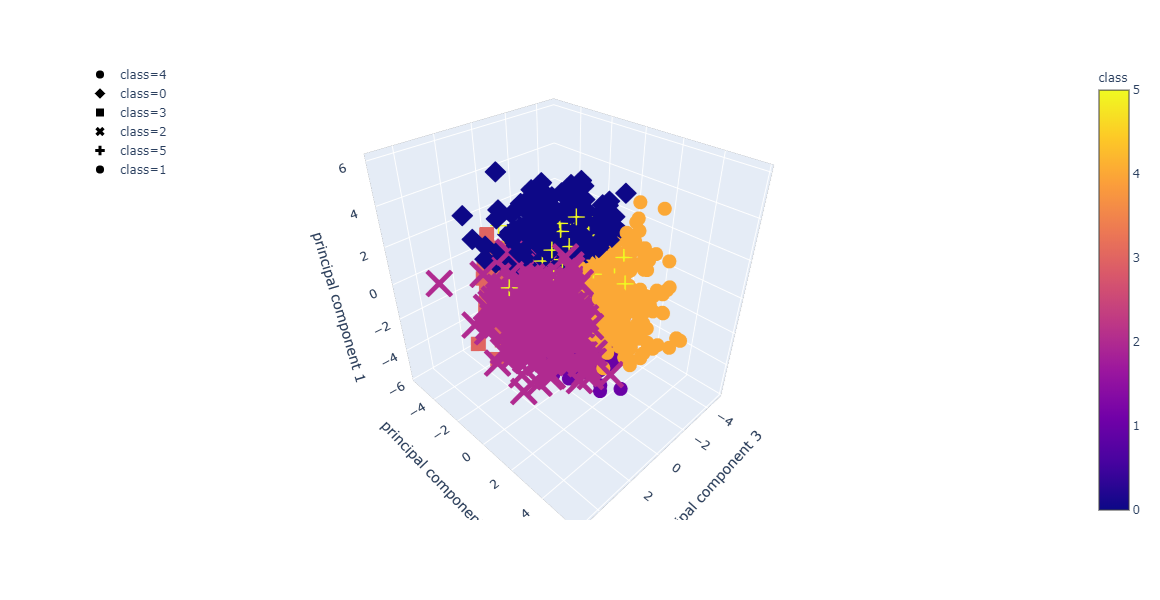

In [64]:
# Since we have three principal components, a 3D-Scatter plot is going to be created.
fig = px.scatter_3d(
    pca_df_result,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()
